# It is a notebok about Naive Bayes Classifier based machine learning model using Python 

**The following libraries are used in this code:**
- **numpy**
- **matplotlib**
- **pandas**
- **seaborn**   

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading the dataset:
**The IRIS dataset is publicly available in UCI machine learning repository**
- After downloading it, extract the file into a known folder

In [10]:
# Loading the the dataset
path = 'D:/iris/iris.data'  #Specifying the path of dataset
column = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(path, header=None, names=column)
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Plots and Graphs:

**To visualize the dataset, we can use the matplotlib and seaborn libraries**
- We are looping through each (numerical)column of the dataset.
- Leave the last column (column[:-1]), since it does not contain numerical data.
- Plot the histogram for each feature using the Seaborn's hisplot function.
- **data** parameter specifies the dataframe.
- **x** specifies the feature to plot.
- **hue** is used to colour the histogram.
- **kde** plots a Kernel Density Curve to show the probability density of the feature.


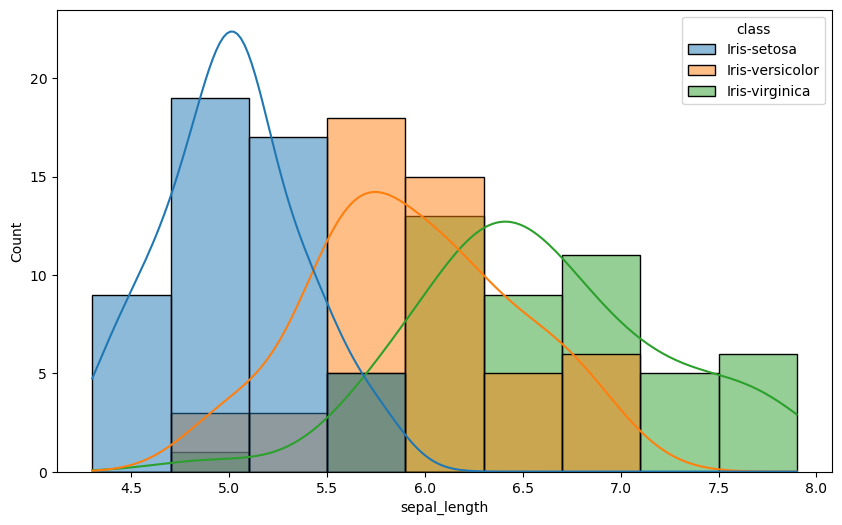

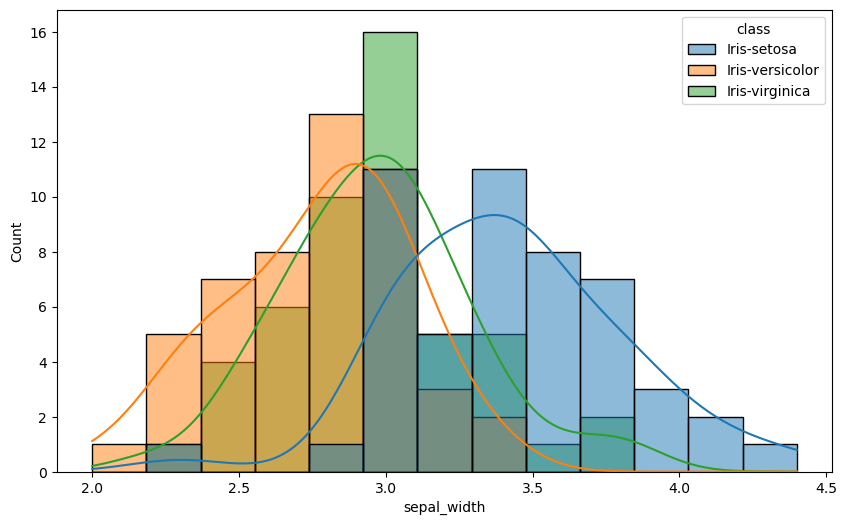

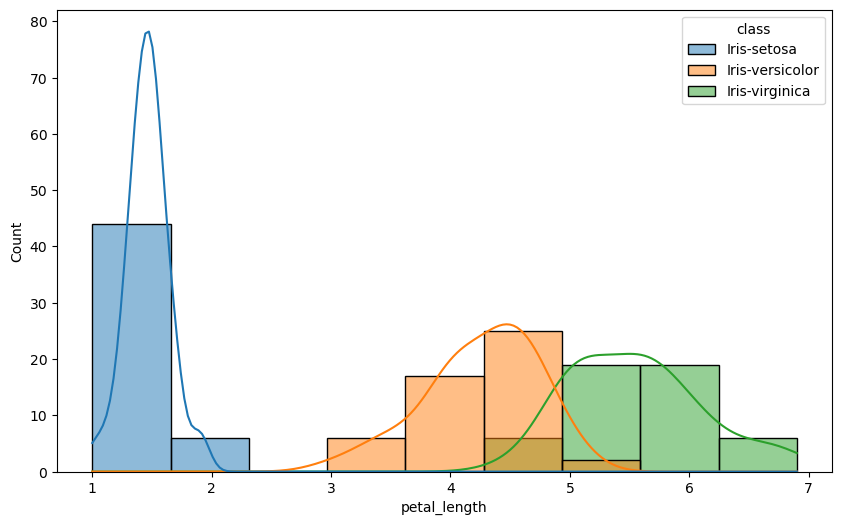

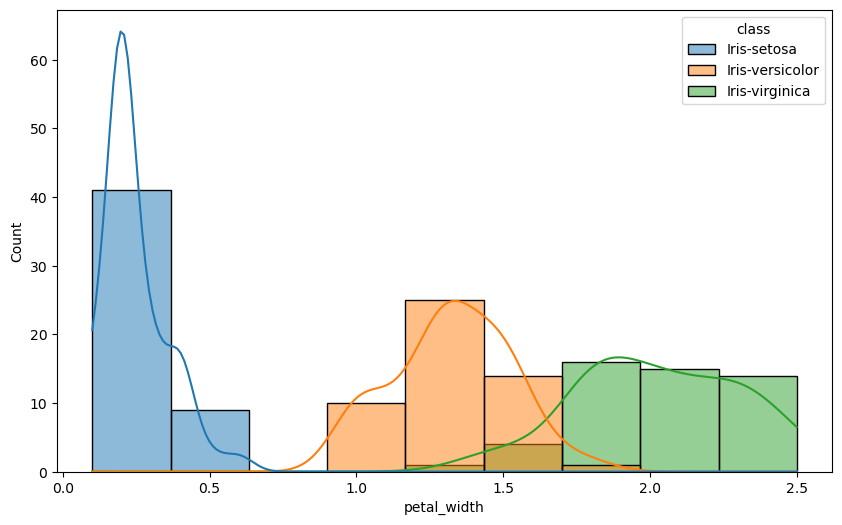

In [11]:
for features in column[:-1]:
    plt.figure(figsize=(10,6))
    sns.histplot(data=iris,x=features,hue='class',kde=True)
    plt.show()

# Calculating prior probabilities:
**The IRIS dataset contains 150 samples, comprising 50 samples each from iris setosa, iris versicolor and iris virginica**
- Prior probability is the likelihood of an event (or established knowledge), before any new data is considered.


In [12]:
#number of samples in each class
N = iris['class'].value_counts()

# Total number of samples
total_samples = len(iris)

# prior probabilities for each class
prior_probabilities = N / total_samples

# Display prior probabilities
print("Prior Probabilities:")
print(prior_probabilities)

Prior Probabilities:
class
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: count, dtype: float64


# Calculation of mean, variance and standard deviation :

 **groupby('class'):** This function groups the dataset by the class. We can calculate the statistical measure of each feature within each class.
 
 **Mean:** Helps to identify the central tendency of each feature in each class.
 
 **Variance:** It indicates the spread of feature values around the mean.
 
 **Standard Deviation:** It is the square root of variance and provides a more interpretable measure of spread.

In [13]:
mean = iris.groupby('class').mean()
variance = iris.groupby('class').var()
stdev = iris.groupby('class').std()

# Display mean and variance for each feature by class
print("Mean values by class:")
print(mean)
print("\nStandard Deviation values by class:")
print(stdev)
print("\nVariance values by class:")
print(variance)

Mean values by class:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026

Standard Deviation values by class:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa          0.352490     0.381024      0.173511     0.107210
Iris-versicolor      0.516171     0.313798      0.469911     0.197753
Iris-virginica       0.635880     0.322497      0.551895     0.274650

Variance values by class:
                 sepal_length  sepal_width  petal_length  petal_width
class                                                                
Iris-setosa          0.124249     0.145180      0.030106     0.011494
Iris

# Gaussian Probability:

**1. Defines a function `gaussian_probability` to calculate the probability density of a feature value `x`**
    
    
**This formula calculates the likelihood of observing the feature value 'x' given the mean and variance for that feature within the class.** 
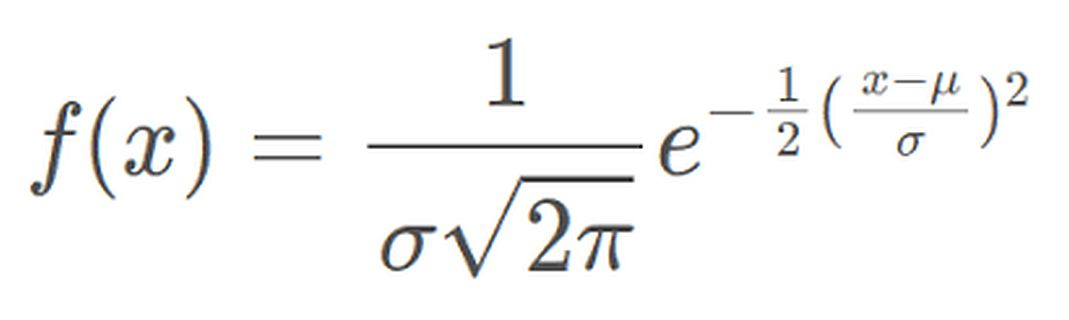


In [14]:
def gaussian_probability(x, mean, variance):     
    return (1 / np.sqrt(2 * np.pi) * variance) * np.exp((-0.5)*(((x-mean)/variance)**2))

# Naive Bayes Classifier Function:

This function predicts the class of a sample using the Gaussian Naive Bayes algorithm:  

1. **Class Probabilities:**  
   - Initializes probabilities for each class.  

2. **Likelihood & Posterior:**  
   - Calculates likelihoods using the Gaussian formula.  
   - Multiplies likelihoods with prior probabilities to compute posteriors.  

3. **Normalization & Prediction:**  
   - Normalizes posteriors to sum to 1.  
   - Returns the class with the highest posterior probability and the probabilities.  

**Note:** Assumes features are independent and Gaussian-distributed.  


In [15]:
def naive_bayes_classifier(sample):
    class_prob = {}
    for cls in iris['class'].unique():
        # Initialize the posterior probability with the prior
        prior = prior_probabilities[cls]
        p = 1  
        
        # Calculate the likelihood for each feature using the Gaussian formula
        for feature in column[:-1]:
            mn = mean.loc[cls, feature]
            var = variance.loc[cls, feature]
            x = sample[feature]
            # Compute p(X_j | C_i) using the Gaussian formula
            p *= gaussian_probability(x, mn, var)
        
        # Posterior p(C|X) = p(X|C) * P(C)
        class_prob[cls] = p * prior
    
    # Normalize the posteriors to get probabilities
    total_posterior = sum(class_prob.values())
    for cls in class_prob:
        class_prob[cls] /= total_posterior
    
    # Return the class with the highest posterior probability
    return max(class_prob, key=class_prob.get), class_prob

#  Menu:

1. **Option 1:**  
   - Select a sample from the dataset by entering its index.  
   - The program displays the sample and predicts its class using the Naive Bayes classifier.

2. **Option 2:**  
   - Enter new feature values manually.  
   - The classifier predicts the class for the input sample.

3. **Option 3:**  
   - Exits the program.

**Invalid Input Handling:**  
Displays an error message and prompts the user to try again for invalid inputs.  


In [ ]:
while True:
    print("\nMenu:")
    print("1) Select a sample from the dataset")
    print("2) Enter new sample values")
    print("3) Exit")
    
    choice = input("Enter your choice (1/2/3): ")
    
    if choice == '1':
        try:
            sample_index = int(input("Enter sample number (1-150): ")) - 1
            if 0 <= sample_index < len(iris):
                sample = iris.iloc[sample_index][:-1]  # Exclude the class column
                print(f"\nSelected Sample {sample_index + 1}:\n{sample}")
                predicted_class, class_probabilities = naive_bayes_classifier(sample)
                print(f"Predicted Class: {predicted_class}")
                print("Class Probabilities:", class_probabilities)
            else:
                print("Invalid sample number. Please enter a number between 1 and 150.")
        except ValueError:
            print("Invalid input. Please enter a valid number.")
    
    elif choice == '2':
        try:
            new_sample = {feature: float(input(f"Enter {feature} (in cm): ")) for feature in column[:-1]}
            new_sample = pd.Series(new_sample)
            print("\nNew Sample:\n", new_sample)
            predicted_class, class_probabilities = naive_bayes_classifier(new_sample)
            print(f"Predicted Class: {predicted_class}")
            print("Class Probabilities:", class_probabilities)
        except ValueError:
            print("Invalid input. Please enter numeric values.")
    
    elif choice == '3':
        print("Exiting the program.")
        break
    
    else:
        print("Invalid choice. Please select option 1, 2, or 3.")



Menu:
1) Select a sample from the dataset
2) Enter new sample values
3) Exit


Enter your choice (1/2/3):  1
Enter sample number (1-150):  3



Selected Sample 3:
sepal_length    4.7
sepal_width     3.2
petal_length    1.3
petal_width     0.2
Name: 2, dtype: object
Predicted Class: Iris-setosa
Class Probabilities: {'Iris-setosa': 1.0, 'Iris-versicolor': 1.3513232201296722e-215, 'Iris-virginica': 2.0025181705604529e-162}

Menu:
1) Select a sample from the dataset
2) Enter new sample values
3) Exit


Enter your choice (1/2/3):  1
Enter sample number (1-150):  50



Selected Sample 50:
sepal_length    5.0
sepal_width     3.3
petal_length    1.4
petal_width     0.2
Name: 49, dtype: object
Predicted Class: Iris-setosa
Class Probabilities: {'Iris-setosa': 1.0, 'Iris-versicolor': 2.7597759983810828e-220, 'Iris-virginica': 2.632844037775246e-167}

Menu:
1) Select a sample from the dataset
2) Enter new sample values
3) Exit


Enter your choice (1/2/3):  1
Enter sample number (1-150):  53



Selected Sample 53:
sepal_length    6.9
sepal_width     3.1
petal_length    4.9
petal_width     1.5
Name: 52, dtype: object
Predicted Class: Iris-virginica
Class Probabilities: {'Iris-setosa': 0.0, 'Iris-versicolor': 0.48107235345171345, 'Iris-virginica': 0.5189276465482865}

Menu:
1) Select a sample from the dataset
2) Enter new sample values
3) Exit


Enter your choice (1/2/3):  1
Enter sample number (1-150):  78



Selected Sample 78:
sepal_length    6.7
sepal_width     3.0
petal_length    5.0
petal_width     1.7
Name: 77, dtype: object
Predicted Class: Iris-virginica
Class Probabilities: {'Iris-setosa': 0.0, 'Iris-versicolor': 7.92577380708013e-22, 'Iris-virginica': 1.0}

Menu:
1) Select a sample from the dataset
2) Enter new sample values
3) Exit
